# ML LAB 4

[.5 points] Load the data into memory and save it to a pandas data frame. Do not normalize or one-hot encode any of the features until asked to do so.  Remove any observations that having missing data. Encode any string data as integers for now. 


In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('acs2017_county_data.csv')
df

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja Municipio,54754,26269,28485,96.7,3.1,0.1,0.0,...,1.4,0.6,0.9,31.6,14234,76.2,19.3,4.3,0.2,16.8
3216,72147,Puerto Rico,Vieques Municipio,8931,4351,4580,95.7,4.0,0.0,0.0,...,5.0,0.0,1.7,14.9,2927,40.7,40.9,18.4,0.0,12.8
3217,72149,Puerto Rico,Villalba Municipio,23659,11510,12149,99.7,0.2,0.1,0.0,...,2.1,0.0,2.8,28.4,6873,59.2,30.2,10.4,0.2,24.8
3218,72151,Puerto Rico,Yabucoa Municipio,35025,16984,18041,99.9,0.1,0.0,0.0,...,1.4,1.8,0.1,30.5,7878,62.7,30.9,6.3,0.0,25.4


In [2]:
# Drop rows with any empty cells
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3219 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CountyId          3219 non-null   int64  
 1   State             3219 non-null   object 
 2   County            3219 non-null   object 
 3   TotalPop          3219 non-null   int64  
 4   Men               3219 non-null   int64  
 5   Women             3219 non-null   int64  
 6   Hispanic          3219 non-null   float64
 7   White             3219 non-null   float64
 8   Black             3219 non-null   float64
 9   Native            3219 non-null   float64
 10  Asian             3219 non-null   float64
 11  Pacific           3219 non-null   float64
 12  VotingAgeCitizen  3219 non-null   int64  
 13  Income            3219 non-null   int64  
 14  IncomeErr         3219 non-null   int64  
 15  IncomePerCap      3219 non-null   int64  
 16  IncomePerCapErr   3219 non-null   int64  


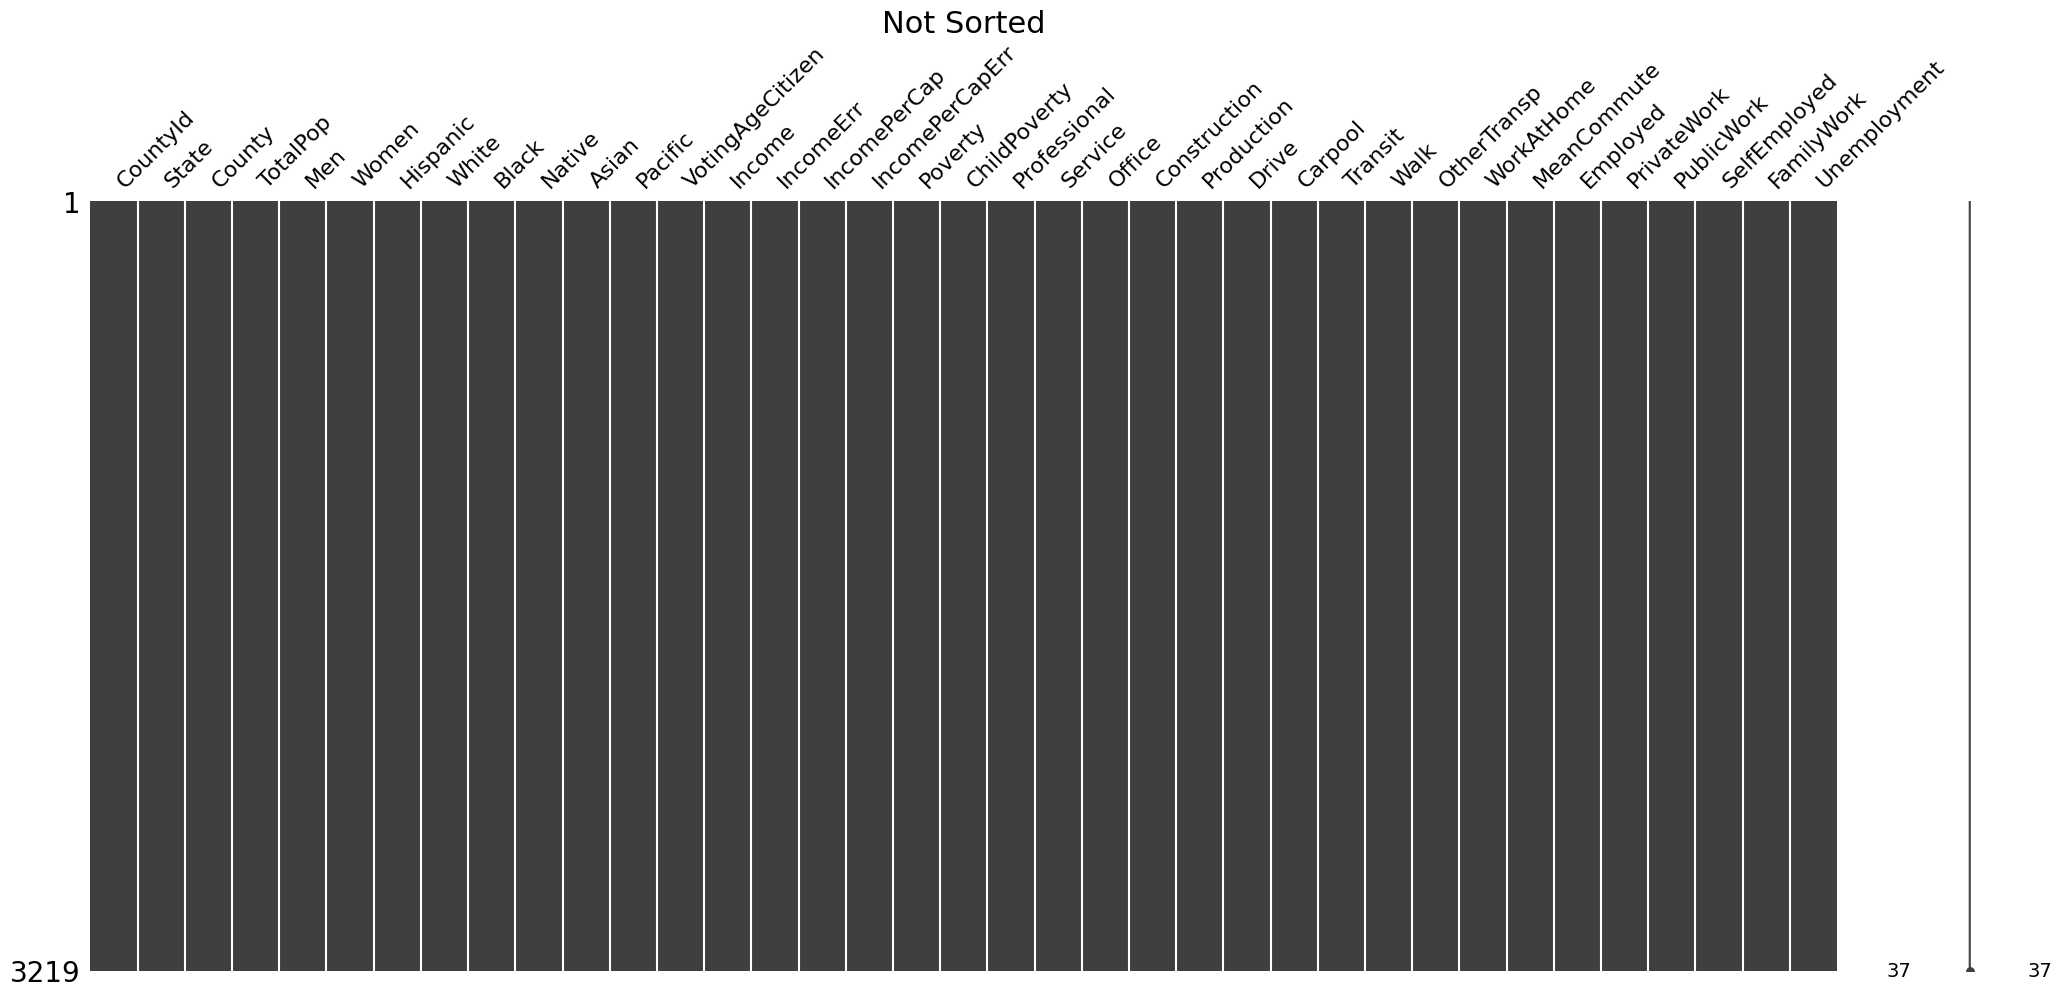

<Figure size 640x480 with 0 Axes>

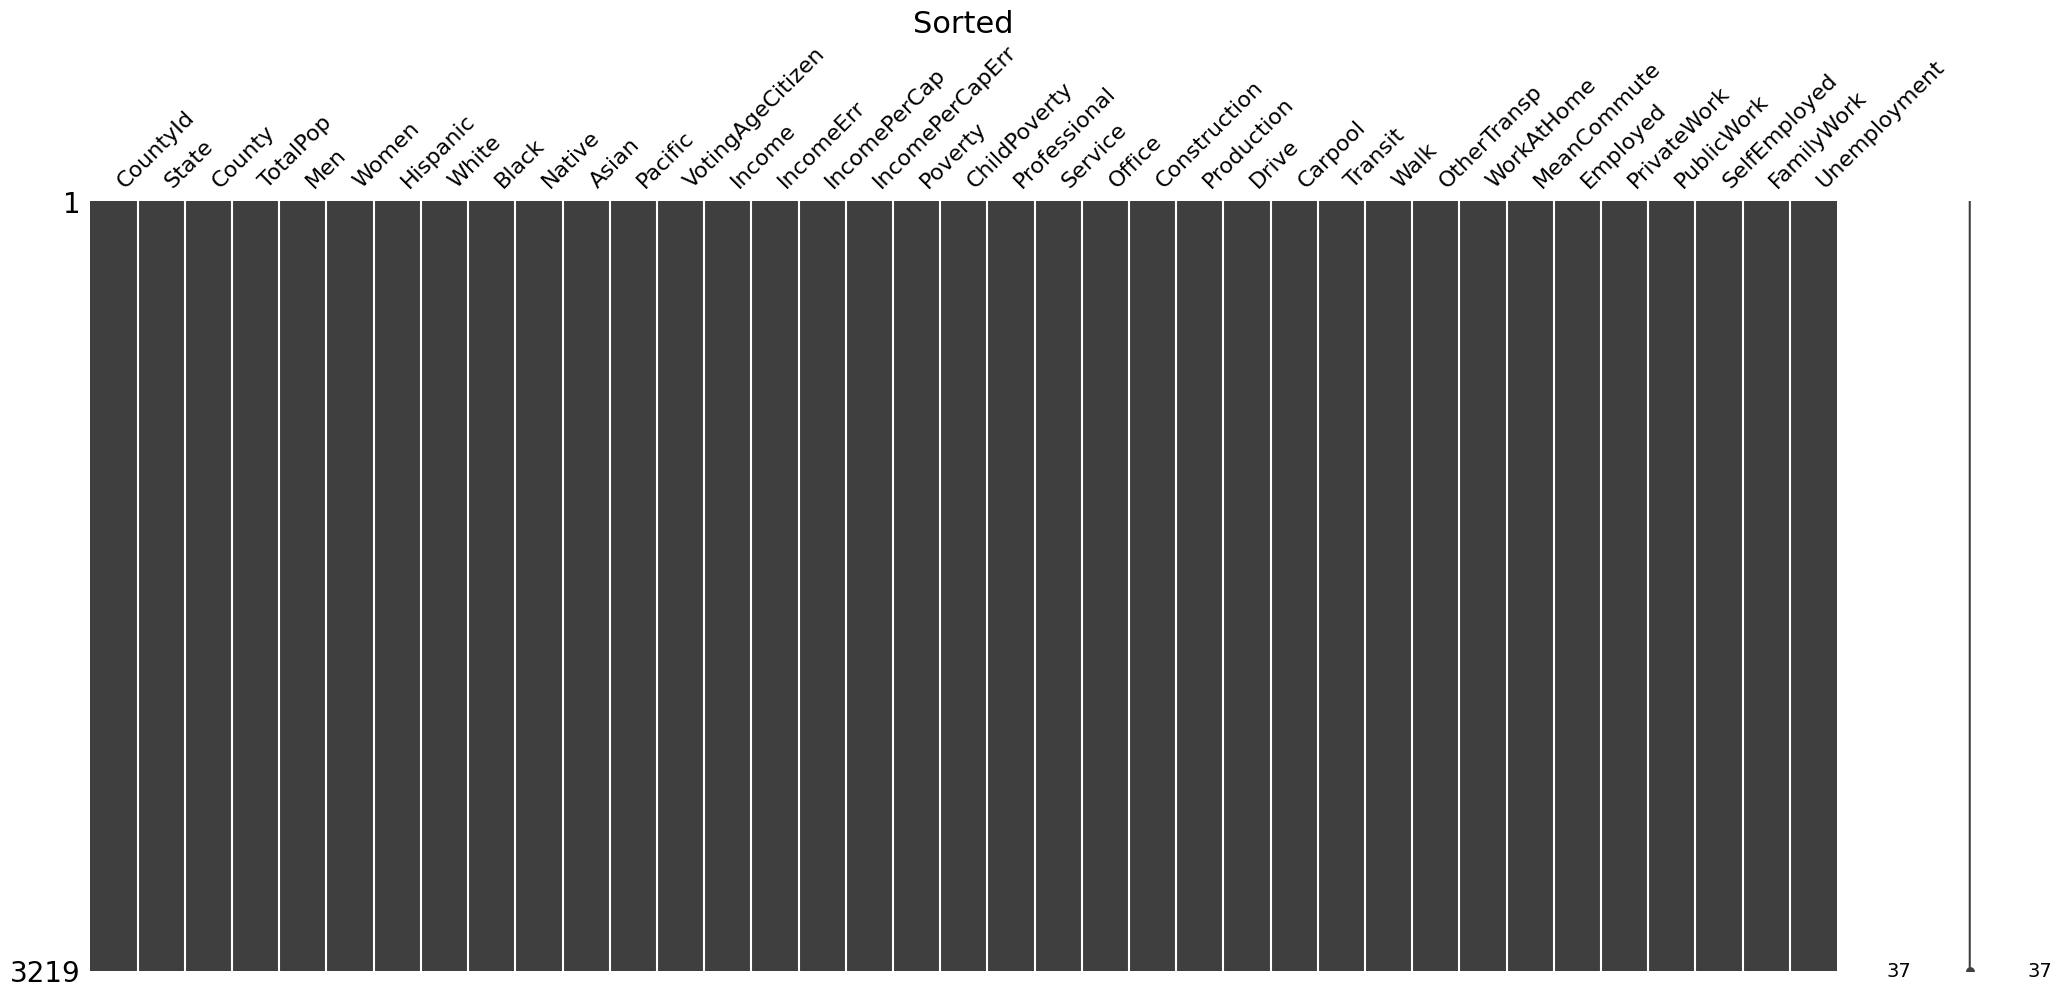

In [4]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# External package: conda install missingno 
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.figure()
mn.matrix(df.sort_values(by=["State","County"]))
plt.title("Sorted",fontsize=22)
plt.show()

No missing data.

[.5 points] Assume you are equally interested in the classification performance for each class in the dataset. Split the dataset into 80% for training and 20% for testing.


(array([ 207.,  811., 1066.,  653.,  268.,  106.,   42.,   42.,   16.,
           8.]),
 array([ 0.  ,  8.36, 16.72, 25.08, 33.44, 41.8 , 50.16, 58.52, 66.88,
        75.24, 83.6 ]),
 <BarContainer object of 10 artists>)

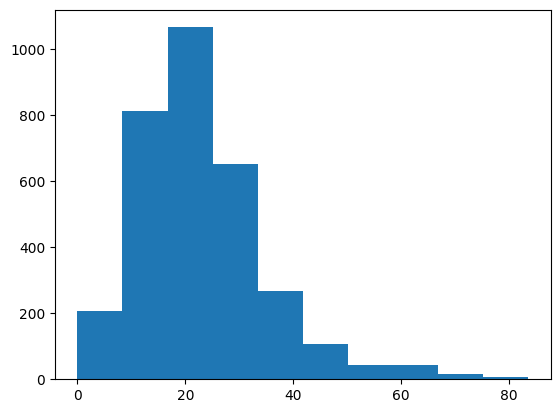

In [5]:
import matplotlib.pyplot as plt

plt.hist(df.ChildPoverty)

In [6]:
min(df.ChildPoverty), max(df.ChildPoverty)

(0.0, 83.6)

In [7]:
try:
    df['CountyState'] = df.County + ', ' +df.State
    df = df.drop('County', axis=1)
except AttributeError: 
    pass
        

In [8]:
#Select Child Poverty as Target
pd_cut = pd.cut(df['ChildPoverty'], bins=[-1, 14,20,30,85], labels=[ 0, 1, 2, 3]) 
y=np.asarray(pd_cut)

#Delete target from rest of the dataset.
df = df.drop('ChildPoverty', axis=1)

#Change State and County names into
#numberical values
list_state=pd.unique(df.State)
list_state=list_state.tolist()
list_state
k=0
for i in list_state:
    df=df.replace(to_replace=i, value=k)
    k=k+1
    
list_county=pd.unique(df.CountyState)
list_county=list_county.tolist()
k=0
for i in list_county:
    df=df.replace(to_replace=i, value=k)
    k=k+1

In [9]:
df.shape



(3219, 36)

In [10]:
X=np.asarray(df)
print(f'Is any y value is NaN: {np.isnan(y).any()}')
print(X)

Is any y value is NaN: False
[[1.0010e+03 0.0000e+00 5.5036e+04 ... 1.0000e-01 5.2000e+00 0.0000e+00]
 [1.0030e+03 0.0000e+00 2.0336e+05 ... 1.0000e-01 5.5000e+00 1.0000e+00]
 [1.0050e+03 0.0000e+00 2.6201e+04 ... 3.0000e-01 1.2400e+01 2.0000e+00]
 ...
 [7.2149e+04 5.1000e+01 2.3659e+04 ... 2.0000e-01 2.4800e+01 3.2160e+03]
 [7.2151e+04 5.1000e+01 3.5025e+04 ... 0.0000e+00 2.5400e+01 3.2170e+03]
 [7.2153e+04 5.1000e+01 3.7585e+04 ... 0.0000e+00 2.4000e+01 3.2180e+03]]


Is any y value is NaN: False


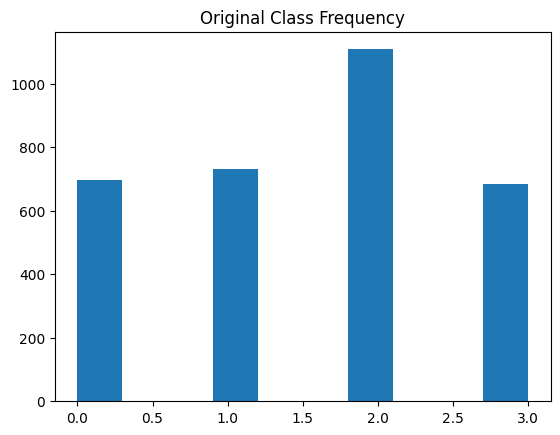

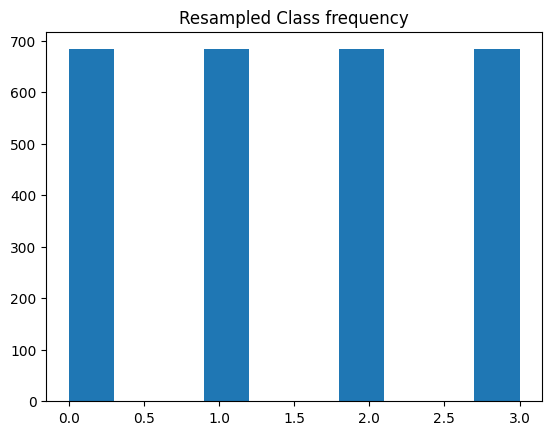

In [11]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Use undersampling to make every 
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(f'Is any y value is NaN: {np.isnan(y).any()}')

plt.hist(y)
plt.title("Original Class Frequency")
plt.show()

plt.hist(y_resampled)
plt.title("Resampled Class frequency")
plt.show()



In [12]:
from sklearn.model_selection import ShuffleSplit

shuffle=ShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=42)

In [13]:
for train_index, test_index in shuffle.split(X_resampled, y_resampled):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]

CLASS NOTEBOOK IS USED FOR THE PART BELOW:

COST

In [14]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_) # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))
        
        W2_num_elems = (self.n_hidden)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden)
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [15]:
from sklearn.metrics import accuracy_score
# just start with the vectorized version and minibatch
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum
        rho_b1_prev = np.zeros(self.b1.shape) # for momentum
        rho_b2_prev = np.zeros(self.b2.shape) # for momentum

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            # adaptive learning rate
            # \frac{\eta}{1+\epsilon\cdot k}
            eta = self.eta / (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.b1,
                                                       self.b2
                                                      )
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                # momentum calculations
                rho_W1, rho_W2 = eta * gradW1, eta * gradW2
                rho_b1, rho_b2 = eta * gradb1, eta * gradb2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                self.b1 -= (rho_b1 + (self.alpha * rho_b1_prev))
                self.b2 -= (rho_b2 + (self.alpha * rho_b2_prev))
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2
                rho_b1_prev, rho_b2_prev = rho_b1, rho_b2

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        return self
    

In [16]:
# to implement the new style of objective function, 
# we just need to update the final layer calculation of the gradient
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2

In [17]:
vals = { 'n_hidden':30, 
         'C':0.1, 'epochs':160, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

nn_quad = TLPMiniBatch(**vals)
nn_cross = TLPMiniBatchCrossEntropy(**vals)

%time nn_cross.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))
%time nn_quad.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))
print("Done")

Epoch: 14/1600

CPU times: total: 3.12 s
Wall time: 2.58 s


Epoch: 160/160

CPU times: total: 3 s
Wall time: 2.32 s
Done


In [18]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

def print_result(nn,X_train,y_train,X_test,y_test,title="",color="red"):
    
    print("=================")
    print(title,":")
    yhat = nn.predict(X_train)
    print('Resubstitution acc:',accuracy_score(y_train,yhat))
    
    yhat = nn.predict(X_test)
    print('Validation acc:',accuracy_score(y_test,yhat))
    
    if hasattr(nn,'val_score_'):
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color,label=title)
        plt.ylabel('Validation Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color,label=title)
        plt.ylabel('Resub Accuracy')
        
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)

In [19]:
class TLPBetterInitial(TLPMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2

Epoch: 200/200

CPU times: total: 4.09 s
Wall time: 3.22 s
Glorot Initial :
Resubstitution acc: 0.36247139588100685
Validation acc: 0.3692870201096892


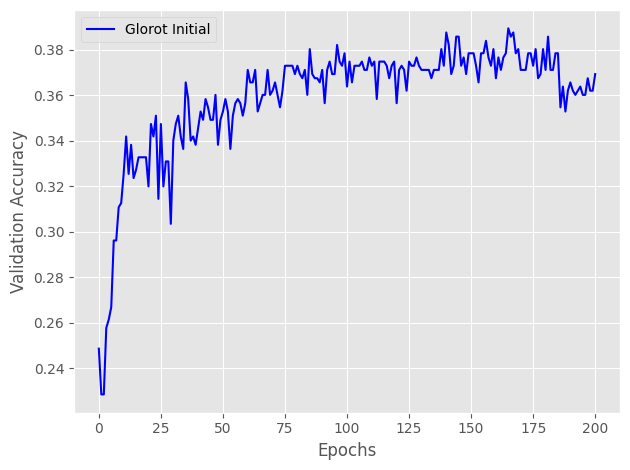

In [20]:
vals['epochs'] = 200

#nn_tradit = TLPMiniBatchCrossEntropy(**vals)
nn_better = TLPBetterInitial(**vals)

#%time nn_tradit.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))
%time nn_better.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))

#print_result(nn_tradit,X_train,y_train,X_test,y_test,title="Traditional",color="red")
print_result(nn_better,X_train,y_train,X_test,y_test,title="Glorot Initial",color="blue")
plt.show()

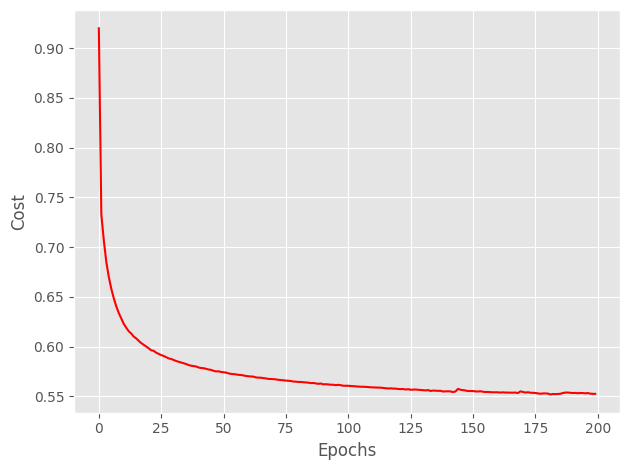

In [21]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_better.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [29]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [30]:
X=np.asarray(normalized_df)
print(f'Is any y value is NaN: {np.isnan(y).any()}')
print(X)

Is any y value is NaN: False
[[0.00000000e+00 0.00000000e+00 5.43874079e-03 ... 1.25000000e-02
  1.27139364e-01 0.00000000e+00]
 [2.81088374e-05 0.00000000e+00 2.01160777e-02 ... 1.25000000e-02
  1.34474328e-01 3.10752020e-04]
 [5.62176748e-05 0.00000000e+00 2.58538591e-03 ... 3.75000000e-02
  3.03178484e-01 6.21504040e-04]
 ...
 [9.99943782e-01 1.00000000e+00 2.33384341e-03 ... 2.50000000e-02
  6.06356968e-01 9.99378496e-01]
 [9.99971891e-01 1.00000000e+00 3.45856099e-03 ... 0.00000000e+00
  6.21026895e-01 9.99689248e-01]
 [1.00000000e+00 1.00000000e+00 3.71188468e-03 ... 0.00000000e+00
  5.86797066e-01 1.00000000e+00]]


Is any y value is NaN: False


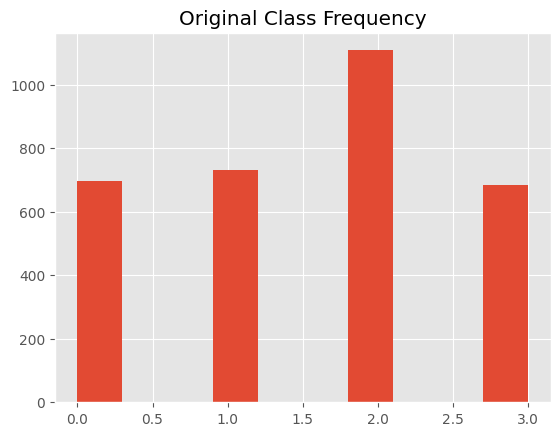

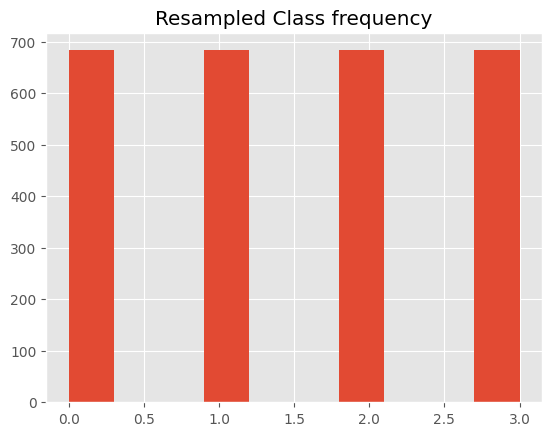

In [31]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Use undersampling to make every 
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(f'Is any y value is NaN: {np.isnan(y).any()}')

plt.hist(y)
plt.title("Original Class Frequency")
plt.show()

plt.hist(y_resampled)
plt.title("Resampled Class frequency")
plt.show()


In [32]:
from sklearn.model_selection import ShuffleSplit

shuffle=ShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=42)

In [33]:
for train_index, test_index in shuffle.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Epoch: 200/200

CPU times: total: 2.91 s
Wall time: 2.29 s
Glorot Initial :
Resubstitution acc: 0.6248543689320388
Validation acc: 0.6273291925465838


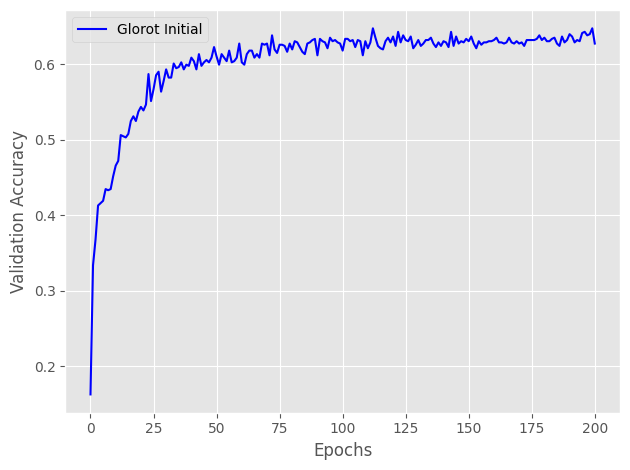

In [34]:
vals['epochs'] = 200

#nn_tradit = TLPMiniBatchCrossEntropy(**vals)
nn_better = TLPBetterInitial(**vals)

#%time nn_tradit.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))
%time nn_better.fit(X_train, y_train, print_progress=1, XY_test=(X_test, y_test))

#print_result(nn_tradit,X_train,y_train,X_test,y_test,title="Traditional",color="red")
print_result(nn_better,X_train,y_train,X_test,y_test,title="Glorot Initial",color="blue")
plt.show()

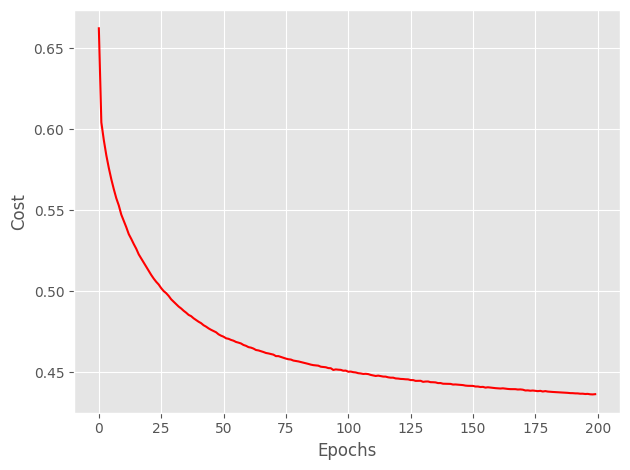

In [35]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_better.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()